In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import openpyxl
import matplotlib.pyplot as plt
import statistics as st
import numpy as np
from scipy.optimize import curve_fit

In [130]:
path = 'data.xlsx'
wb_obj = openpyxl.load_workbook(path, data_only = True)
df = wb_obj['Состояние системы']
x_scatter =[]
y_scatter = []
for i in range(8):
    x_scat = []
    y_scat = []
    for j in range(18):
        a, b = (df.cell(row = 3 + j, column = 2*i+1)).value, (df.cell(row = 3 + j, column = 2*i+2)).value
        if (a is not None and b is not None):
            x_scat.append(a)
            y_scat.append(b)
    x_scatter.append(4.7 - np.array(x_scat))
    y_scatter.append(10 - np.array(y_scat))

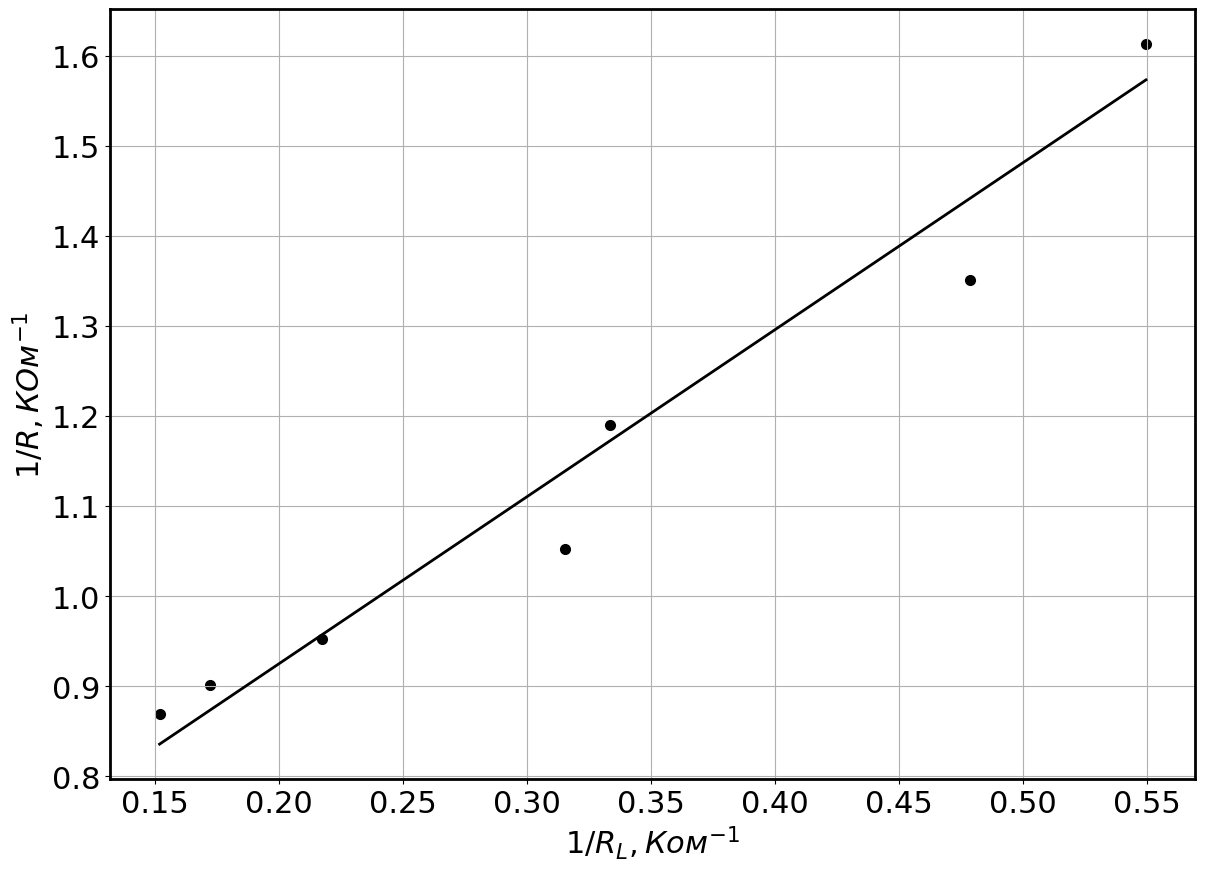

In [215]:
plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D', 'x']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()

X, y = x_scatter[7], y_scatter[7]
X, y = 1 / y, 1 / X

popt, pcov = curve_fit(lambda x, a, b: a + b*x, X, y, sigma = 0.1 * y * y)
plt.scatter(X, y, c='black', linewidth=2,)
plt.plot(np.linspace(min(X), max(X), 2), popt[0] + popt[1] * np.linspace(min(X)*0.9, max(X)*1.1, 2), c='black', linewidth=2)
ax.set_xlabel(r"$1/R_L, Ком^{-1}$")
ax.set_ylabel(r"$1/R, КОм^{-1}$")
fig.savefig(r'fit_coefs_linear.eps', format='eps')

In [216]:
popt, np.sqrt(pcov)

/tmp/ipykernel_330/2161760635.py:1: RuntimeWarning: invalid value encountered in sqrt
  popt, np.sqrt(pcov)


(array([0.62000536, 1.5771268 ]),
 array([[0.03909189,        nan],
        [       nan, 0.15591244]]))

In [217]:
GG = -1 / (1.2 * 1000)

In [218]:
alphae = -popt[0] / GG / 1000 / (1 - -popt[0] / GG / 1000)
alphae

2.906348213850226

In [219]:
C2e = -popt[1] * (alpha + 1) * alpha * GG * (R7 * R9 * C / R8)
C2e / alpha, C1, C2e, C2

(1.6715096986154345e-08, 1e-08, 5.3437923731867195e-08, 1e-07)

In [72]:
path = 'data.xlsx'
wb_obj = openpyxl.load_workbook(path, data_only = True)
df = wb_obj['Состояние системы']
x_scatter =[]
y_scatter = []
for i in range(7):
    x_scat = []
    y_scat = []
    for j in range(31):
        a, b = (df.cell(row = 4 + j, column = 20 + 2*i+1)).value, (df.cell(row = 4 + j, column = 20 + 2*i+2)).value
        if (a is not None and b is not None):
            x_scat.append(a)
            y_scat.append(b)
    x_scatter.append(np.array(x_scat))
    y_scatter.append(np.array(y_scat))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


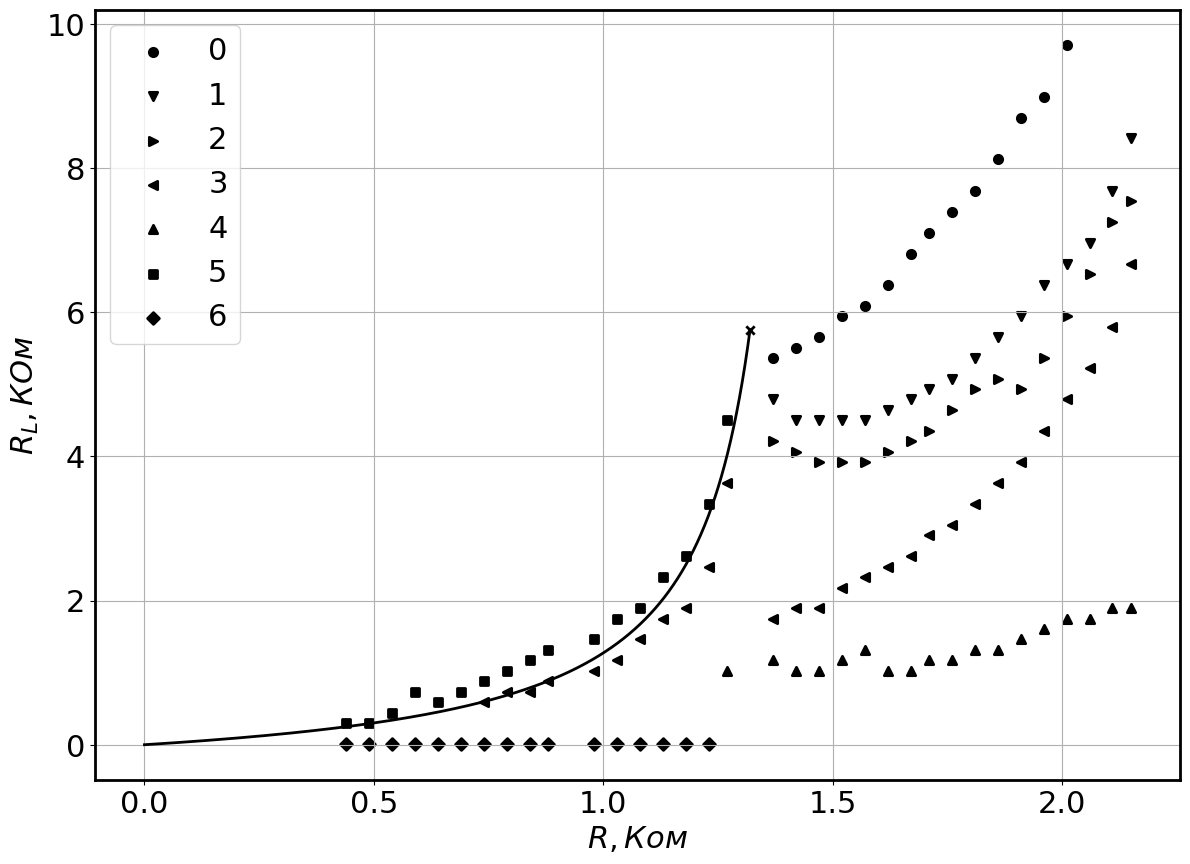

In [116]:
plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D', 'x']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()

for i in range(len(x_scatter)):
    ax.scatter(x_scatter[i], y_scatter[i], c='black', marker=markers[i], label=str(i), linewidth=2)

GG = VAC(0.01) / 0.01
RL = np.linspace(0.1, 10000, 1000)

GG = VAC(0.01) / 0.01
alpha = C2 / C1
RL = np.linspace(0.1, R8 / R7 / R9 / C * C1 / GG**2, 1000)
L = R7 * R9 * C * RL / R8
R = - (alpha + 1) / (alpha * GG + C2 / alpha / L / GG)
plt.plot(R / 1000, RL / 1000, c='black', linewidth=2)
ax.scatter(-1/GG/1000, R8 / R7 / R9 / C * C1 / GG**2 / 1000, c='black', linewidth=2, marker='x')

ax.legend()
ax.set_ylabel(r"$R_L, КОм$")
ax.set_xlabel(r"$R, Ком$")
fig.savefig(r'critical_line_teor.eps', format='eps')

In [118]:
R8 / R7 / R9 / C * C1 / GG**2, -1/GG

(5749.920000000001, 1320.0)

In [213]:
C1 = 10e-9   # 10nF
C2 = 100e-9  # 100nF

# Chua Diode
R1 = 220
R2 = 220
R3 = 2200
R4 = 22000
R5 = 22000
R6 = 3300

R7 = 100  # 100 Ohms
R8 = 3300  # 1k Ohms
R9 = 1000  # 1k Ohms
C = 100e-9  # 100nF

def RealChua(t, inp, R, R10):
    G = 1 / R
    x = inp[0]  # v_1
    y = inp[1]  # v_2
    z = inp[2]  # i_L

    Esat = 10    # 9V batteries
    E1 = R3 / (R2 + R3) * Esat
    E2 = R6 / (R5 + R6) * Esat

    m12 = -1 / R6
    m02 = 1 / R4
    m01 = 1 / R1
    m11 = -1 / R3

    m1 = m12 + m11

    if E1 > E2:
        m0 = m11 + m02
    else:
        m0 = m12 + m01

    mm1 = m01 + m02
    Emax = max(E1, E2)
    Emin = min(E1, E2)

    if abs(x) < Emin:
        g = x * m1
    elif abs(x) < Emax:
        g = x * m0
        if x > 0:
            g += Emin * (m1 - m0)
        else:
            g += Emin * (m0 - m1)
    else:  # abs(x) >= Emax
        g = x * mm1
        if x > 0:
            g += Emax * (m0 - mm1) + Emin * (m1 - m0)
        else:
            g += Emax * (mm1 - m0) + Emin * (m0 - m1)
    L = R7 * R9 * C * R10 / R8  # 18mH

    # Chua's Circuit Equations
    xdot = (1 / C1) * (G * (y - x) - g)
    ydot = (1 / C2) * (G * (x - y) + z)
    zdot = -(1 / L) * y

    return np.array([xdot, ydot, zdot])


def VAC(x):
    Esat = 10    # 9V batteries
    E1 = R3 / (R2 + R3) * Esat
    E2 = R6 / (R5 + R6) * Esat

    m12 = -1 / R6
    m02 = 1 / R4
    m01 = 1 / R1
    m11 = -1 / R3

    m1 = m12 + m11

    if E1 > E2:
        m0 = m11 + m02
    else:
        m0 = m12 + m01

    mm1 = m01 + m02
    Emax = max(E1, E2)
    Emin = min(E1, E2)

    if abs(x) < Emin:
        g = x * m1
    elif abs(x) < Emax:
        g = x * m0
        if x > 0:
            g += Emin * (m1 - m0)
        else:
            g += Emin * (m0 - m1)
    else:  # abs(x) >= Emax
        g = x * mm1
        if x > 0:
            g += Emax * (m0 - mm1) + Emin * (m1 - m0)
        else:
            g += Emax * (mm1 - m0) + Emin * (m0 - m1)

    return g

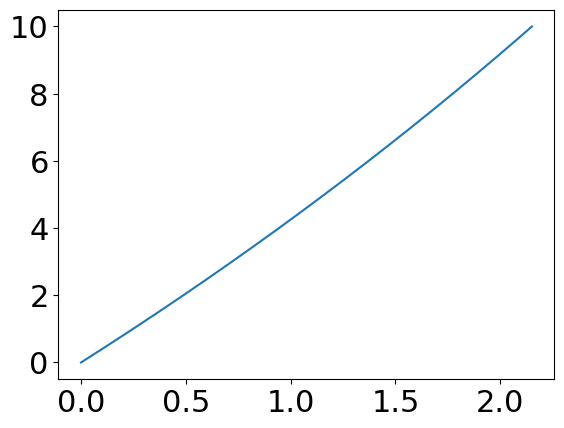

In [55]:
%matplotlib notebook

grid_x, grid_y = np.mgrid[3.13:3.55:20j, 0:2.19:20j]
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

# Создание графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Построение поверхности
ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis')
ax.scatter(x, y, z, c='black')

ax.set_xlabel('R')
ax.set_ylabel('RL')
ax.set_zlabel('Ux')

NameError: name 'x' is not defined